In [9]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np

best_threshold, best_precision_threshold, best_recall_threshold, best_accuracy_threshold = [None], [None], [None], [None]

def Plot_ROC(data, criterion="align_score"):
    # Step 6: Calculate ROC-AUC and plot ROC curve
    fprs, tprs, thresholds = roc_curve(data['detection_label'], data[criterion].apply(lambda x:-x))
    roc_auc = roc_auc_score(data['detection_label'], data[criterion].apply(lambda x:-x))

    # Plot ROC curve
    plt.plot(fprs, tprs, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC on {criterion} (Positive:Hall detected)')
    plt.legend(loc="lower right")
    plt.show()

    return fprs, tprs, thresholds

def Optimize(data, criterion="align_score", optimize = True):
    
    fprs, tprs, thresholds = Plot_ROC(data)
    from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

    # Assuming you have calculated fpr, tpr, thresholds
    # print(thresholds)
    # Calculate F1 scores for each threshold
    f1_scores = [f1_score(data['detection_label'], data[criterion].apply(lambda x: -x) >= threshold) for threshold in thresholds]
    precision_scores = [precision_score(data['detection_label'], data[criterion].apply(lambda x: -x) >= threshold) for threshold in thresholds]
    recall_scores = [recall_score(data['detection_label'], data[criterion].apply(lambda x: -x) >= threshold) for threshold in thresholds]
    accuracy_scores = [accuracy_score(data['detection_label'], data[criterion].apply(lambda x: -x) >= threshold) for threshold in thresholds]

    # for threshold, f1, tpr, fpr, prec, rec, acc in zip(thresholds, f1_scores, tprs, fprs, precision_scores, recall_scores, accuracy_scores):
    #     print(f'Threshold: {-1 * threshold}, TPR: {tpr}, FPR: {fpr}, F1 score: {f1}, Prec: {prec}, Rec: {rec}, Acc: {acc}')

    if optimize:
        # Find the best threshold that maximizes the F1 score
        best_threshold[0] = -1 * thresholds[np.argmax(f1_scores)]

        # Find the best threshold that maximizes precision
        best_precision_threshold[0] = -1 * thresholds[np.argmax(precision_scores)]

        # Find the best threshold that maximizes recall
        best_recall_threshold[0] = -1 * thresholds[np.argmax(recall_scores)]

        # Find the best threshold that maximizes accuracy
        best_accuracy_threshold[0] = -1 * thresholds[np.argmax(accuracy_scores)]

        print("Best F1 Threshold:", best_threshold[0])
        print("Best Precision Threshold:", best_precision_threshold[0])
        print("Best Recall Threshold:", best_recall_threshold[0])
        print("Best Accuracy Threshold:", best_accuracy_threshold[0])
   

    # Print metrics for each threshold on validation set
    thresholds = -1 * thresholds
    thresholds[0] = -0.01
    for threshold, f1, tpr, fpr, prec, rec, acc in zip(thresholds, f1_scores, tprs, fprs, precision_scores, recall_scores, accuracy_scores):
        if threshold in [best_threshold[0], best_precision_threshold[0], best_recall_threshold[0], best_accuracy_threshold[0]] or abs(threshold - best_threshold[0]) < 0.01:
            print(f'Threshold: {threshold}, TPR: {tpr}, FPR: {fpr}, F1 score: {f1}, Prec: {prec}, Rec: {rec}, Acc: {acc}')

    # Plot metrics as thresholds change
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores, label='F1 Score')
    plt.plot(thresholds, precision_scores, label='Precision')
    plt.plot(thresholds, recall_scores, label='Recall')
    plt.plot(thresholds, accuracy_scores, label='Accuracy')
    plt.xlabel('Threshold')
    plt.ylabel('Metric Score')
    plt.title('Metrics vs. Threshold on Test Set')
    plt.legend()
    plt.grid(True)
    plt.show()

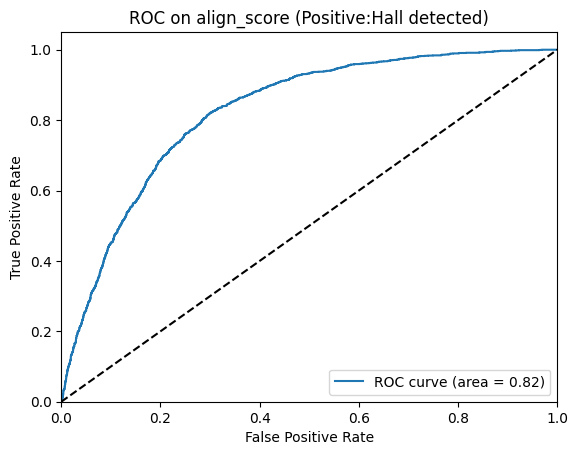

/Users/blakeliu/anaconda3/envs/Try/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best F1 Threshold: 0.6183757781982422
Best Precision Threshold: 0.0002970077039208263
Best Recall Threshold: 0.9966006875038147
Best Accuracy Threshold: 0.26112470030784607
Threshold: 0.0002970077039208263, TPR: 0.0006180469715698393, FPR: 0.0, F1 score: 0.0012353304508956147, Prec: 1.0, Rec: 0.0006180469715698393, Acc: 0.7198544698544699
Threshold: 0.26112470030784607, TPR: 0.4746600741656366, FPR: 0.10760712566201251, F1 score: 0.5421814331097776, Prec: 0.6320987654320988, Rec: 0.4746600741656366, Acc: 0.7752945252945252
Threshold: 0.6110049486160278, TPR: 0.7509270704573547, FPR: 0.24675012036591237, F1 score: 0.6298600311041992, Prec: 0.5424107142857143, Rec: 0.7509270704573547, Acc: 0.7525987525987526
Threshold: 0.6115567088127136, TPR: 0.7515451174289246, FPR: 0.24675012036591237, F1 score: 0.6302150816273646, Prec: 0.5426149040606872, Rec: 0.7515451174289246, Acc: 0.7527720027720027
Threshold: 0.6125223636627197, TPR: 0.7515451174289246, FPR: 0.24723158401540685, F1 score: 0.629

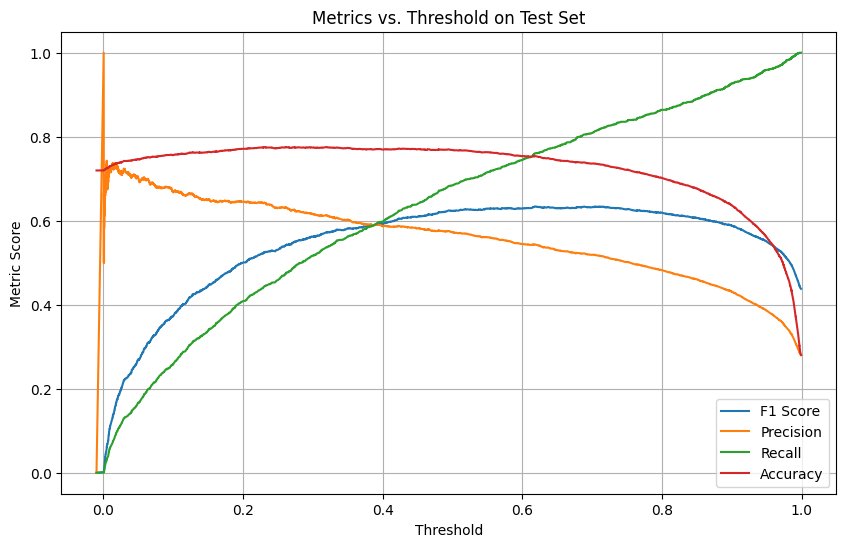

In [10]:
# Read the CSV file into a pandas DataFrame
csv_file_path = "train_data_with_Alignscore.csv"#"test.csv" #
train_df = pd.read_csv(csv_file_path)
train_df['align_score'] = train_df['align_score'].apply(lambda x: float(x[1:-1]))
# print(type(train_df['score'][0]))
# Call the Plot_Analysis() function and pass the DataFrame as an argument
Optimize(train_df)



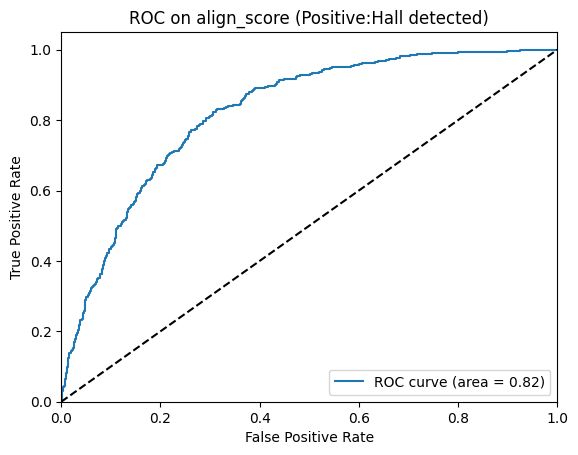

/Users/blakeliu/anaconda3/envs/Try/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold: 0.6098337173461914, TPR: 0.7846153846153846, FPR: 0.2781557067271353, F1 score: 0.6296296296296297, Prec: 0.5257731958762887, Rec: 0.7846153846153846, Acc: 0.7395550732501357
Threshold: 0.6101278066635132, TPR: 0.7865384615384615, FPR: 0.2781557067271353, F1 score: 0.630686198920586, Prec: 0.5263835263835264, Rec: 0.7865384615384615, Acc: 0.7400976668475312
Threshold: 0.6110230088233948, TPR: 0.7865384615384615, FPR: 0.2789115646258503, F1 score: 0.6302003081664099, Prec: 0.525706940874036, Rec: 0.7865384615384615, Acc: 0.7395550732501357
Threshold: 0.6135616898536682, TPR: 0.7884615384615384, FPR: 0.2789115646258503, F1 score: 0.6312548113933795, Prec: 0.5263157894736842, Rec: 0.7884615384615384, Acc: 0.7400976668475312
Threshold: 0.6180912852287292, TPR: 0.7884615384615384, FPR: 0.2819349962207105, F1 score: 0.6293169608595548, Prec: 0.5236270753512133, Rec: 0.7884615384615384, Acc: 0.737927292457949
Threshold: 0.6187999248504639, TPR: 0.7903846153846154, FPR: 0.2819349962

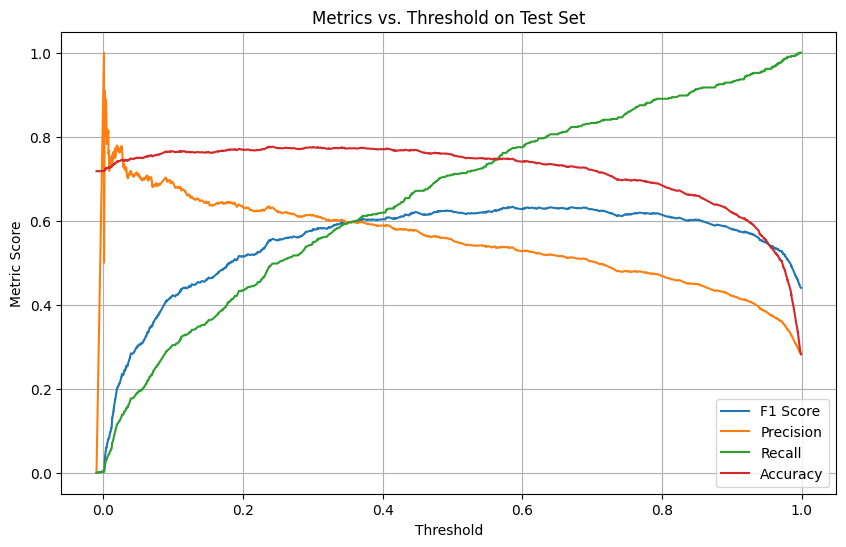

In [11]:

# Read the CSV file into a pandas DataFrame
csv_file_path = "val_data_with_Alignscore.csv"#"test.csv" #
val_df = pd.read_csv(csv_file_path)
val_df['align_score'] = val_df['align_score'].apply(lambda x: float(x[1:-1]))
# print(type(train_df['score'][0]))
# Call the Plot_Analysis() function and pass the DataFrame as an argument
Optimize(val_df, optimize=False)